In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Clean_Data/all_hospitals.csv')
df['Hospital Beds'] = pd.to_numeric(df['Hospital Beds'], errors='coerce')#converting data into numeric to calculate per 10000

# Remove rows with missing or invalid values
df.dropna(subset=['Hospital Beds'], inplace=True)


lowest_beds_states = df.nsmallest(3, 'Hospital Beds')[['State/UT', 'Hospital Beds']]
print("States/UTs with the least amount of beds for their population:" )
print(lowest_beds_states)

States/UTs with the least amount of beds for their population:
                                    State/UT  Hospital Beds
18                               Lakshadweep          250.0
8   Dadra and Nagar Haveli and Daman and Diu          298.0
7                       Dadra & Nagar Haveli          568.0


In [6]:
print("State/UT with the Lowest Hospital beds: ")
lowest=df.nsmallest(1, 'Hospital Beds')[['State/UT', 'Hospital Beds']]
print(lowest)

State/UT with the Lowest Hospital beds: 
       State/UT  Hospital Beds
18  Lakshadweep          250.0


In [17]:
# Read the census data from the CSV file
census_data = pd.read_csv("census.csv")

# Group the data by 'State' and sum the 'Population' for each state
state_population = census_data.groupby('State/UT')['Population'].sum().reset_index()


# Convert population column to integers
state_population['Population'] = state_population['Population'].astype(int)

# Read the hospitals data from the CSV file
hospitals_data = pd.read_csv("hospitals.csv")

# Merge hospitals data with state population data on 'State' column
hospitals_data = pd.merge(hospitals_data, state_population, on='State/UT', how='left')

# Save the updated hospitals data to a new CSV file
hospitals_data.to_csv("Clean_Data/hospitals.csv", index=False)


In [31]:
dt = pd.read_csv('census_2011.csv')

# Calculate the number of hospital beds per 1000 people
df['Hospital Beds per 1000 People'] = df['Hospital Beds'] / (dt['Population'] / 1000)

# Compare to the WHO standard
df['Difference from WHO Standard'] = 3 - df['Hospital Beds per 1000 People']

# Fill missing values with 0
df['Difference from WHO Standard'].fillna(0, inplace=True)

# Calculate the number of additional hospital beds required
df['Additional Hospital Beds Required'] = df['Difference from WHO Standard'] * (dt['Population'] / 1000)



# Calculate the total number of hospital beds and population at the national level
national_population = dt['Population'].sum() /3
national_hospital_beds = df['Hospital Beds'].sum()

# Calculate the number of hospital beds per 1000 people at the national level
national_beds_per_1000 = national_hospital_beds / (national_population / 1000)

# Compare to the WHO standard
national_difference = 3 - national_beds_per_1000

# Calculate the number of additional hospital beds required at the national level
national_additional_beds = national_difference * (national_population / 1000)
import plotly.graph_objects as go

# Create a bar plot with Plotly
fig = go.Figure()

fig.add_trace(go.Bar(
    x=df['State/UT'],
    y=abs(df['Difference from WHO Standard']),
    marker_color='skyblue'
))

fig.update_layout(
    title='Difference between Expected and Available Hospital Beds in Each State/UT',
    xaxis=dict(title='State/UT'),
    yaxis=dict(title='Difference from WHO Standard'),
    showlegend=False
)

fig.show()


In [40]:
df['Additional Hospital Beds Required'] = df['Difference from WHO Standard'] * (dt['Population'] / 1000)
import plotly.graph_objects as go

# Create a bar plot with Plotly
fig = go.Figure()

fig.add_trace(go.Bar(
    x=df['State/UT'],
    y=abs(df['Additional Hospital Beds Required']),
    marker_color='skyblue'
))

fig.update_layout(
    title='Expected Hospital Beds in Each State/UT',
    xaxis=dict(title='State/UT'),
    yaxis=dict(title='Required Beds'),
    showlegend=False
)

fig.show()


Average Livability Score (Urban): 68.90093023255814
Average Livability Score (Rural): 96.75705329153605
Average Amenities Score (Urban): 85.79503875968993
Average Amenities Score (Rural): 87.28777429467084
Correlation Matrix:
                  livability_score  amenities_score
livability_score          1.000000         0.288383
amenities_score           0.288383         1.000000


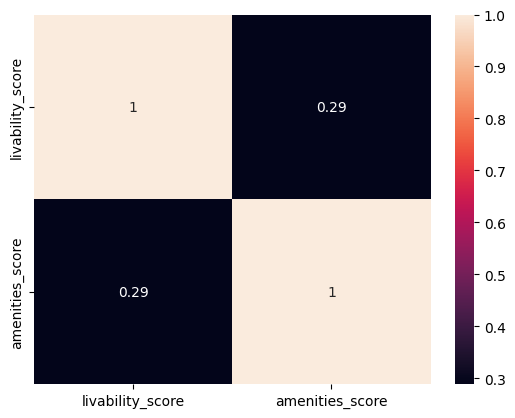

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

housing_data = pd.read_csv("housing.csv")
census_data = pd.read_csv("census.csv")

# Merge housing and census data (assuming a common identifier like 'location_id')
merged_data = pd.merge(housing_data, census_data, left_on="District Name",right_on='District')

# Define functions to assess housing quality
def livability_score(data):
    # Calculate a score based on specific amenities (e.g., plumbing, electricity)
    livability_factors = ["Total Number of Livable", "Total Number of Residence Livable", "Total Number of Residence cum other"]  # Replace with your columns
    score = data[livability_factors].sum(axis=1)
    return score

def amenities_score(data):
    # Calculate a score based on additional amenities (e.g., pool, gym)
    amenity_factors = ["Married_C_1", "Married_C_2", "Married_C_3"]
    score = data[amenity_factors].sum(axis=1)
    return score
merged_data["livability_score"] = livability_score(merged_data)
merged_data["amenities_score"] = amenities_score(merged_data)

# Analyze housing quality by location type (urban/rural)
urban_data = merged_data[merged_data["Rural/Urban"] == "Urban"]
rural_data = merged_data[merged_data["Rural/Urban"] == "Rural"]

# Compare average scores (livability, amenities) between urban and rural areas
print("Average Livability Score (Urban):", urban_data["livability_score"].mean())
print("Average Livability Score (Rural):", rural_data["livability_score"].mean())
print("Average Amenities Score (Urban):", urban_data["amenities_score"].mean())
print("Average Amenities Score (Rural):", rural_data["amenities_score"].mean())

# Correlation analysis with demographic factors
correlation = merged_data[["livability_score", "amenities_score"]].corr()
print("Correlation Matrix:")
print(correlation)

# Heatmap to visualize correlations
sns.heatmap(correlation, annot=True)
plt.show()